In [471]:
import pandas as pd

train_df = pd.read_csv('train_essays.csv')
promts_df = pd.read_csv('train_prompts.csv')

print(train_df.info())

train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


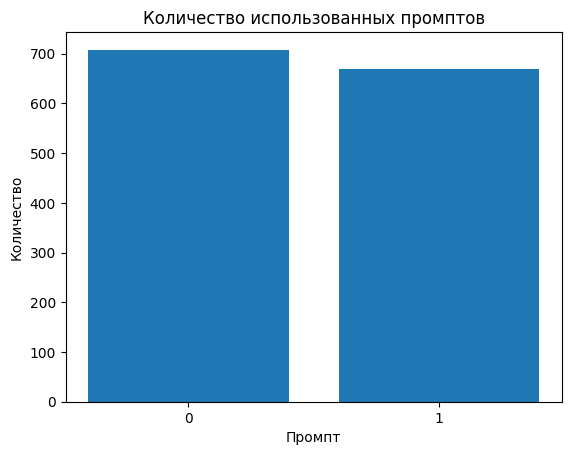

{0: 708, 1: 670}


In [472]:
import matplotlib.pyplot as plt
import numpy as np

unique_values_of_prompts, prompt_counts = np.unique(train_df['prompt_id'], return_counts=True)
unique_dict_of_prompts = {value: count for value, count in zip(unique_values_of_prompts, prompt_counts)}
plt.bar(unique_values_of_prompts, prompt_counts)
plt.title('Количество использованных промптов')
plt.xlabel('Промпт')
plt.ylabel('Количество')
plt.xticks(unique_values_of_prompts)
plt.show()
print(unique_dict_of_prompts)

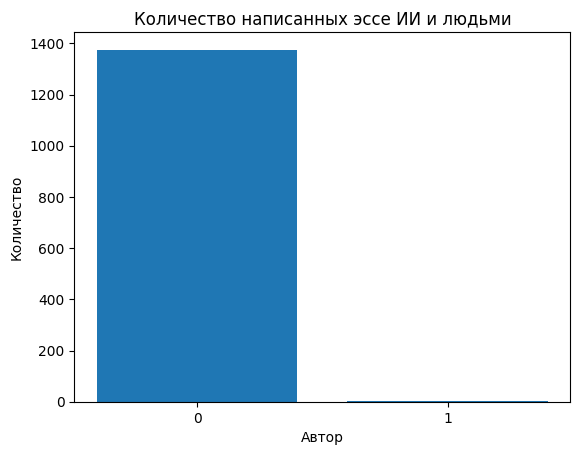

{0: 1375, 1: 3}


In [473]:
unique_values_of_authors, test_counts = np.unique(train_df['generated'], return_counts=True)
unique_dict = {value: count for value, count in zip(unique_values_of_authors, test_counts)}
plt.bar(unique_values_of_authors, test_counts)
plt.title('Количество написанных эссе ИИ и людьми')
plt.xlabel('Автор')
plt.ylabel('Количество')
plt.xticks(unique_values_of_authors)
plt.show()
print(unique_dict)

In [474]:
train_df_ext = pd.read_csv('train_essays_ext.csv')

train_df_ext.rename(columns = {"label":"generated"}, inplace=True)

print(train_df_ext.info)

train_df_ext.head()

<bound method DataFrame.info of                                                     text  generated  \
0      Phones\n\nModern humans today are always on th...          0   
1      This essay will explain if drivers should or s...          0   
2      Driving while the use of cellular devices\n\nT...          0   
3      Phones & Driving\n\nDrivers should not be able...          0   
4      Cell Phone Operation While Driving\n\nThe abil...          0   
...                                                  ...        ...   
44863  Dear Senator,\n\nI am writing to you today to ...          1   
44864  Dear Senator,\n\nI am writing to you today to ...          1   
44865  Dear Senator,\n\nI am writing to you today to ...          1   
44866  Dear Senator,\n\nI am writing to you today to ...          1   
44867  Dear Senator,\n\nI am writing to you today to ...          1   

                            prompt_name           source  RDizzl3_seven  
0                    Phones and driving  

,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


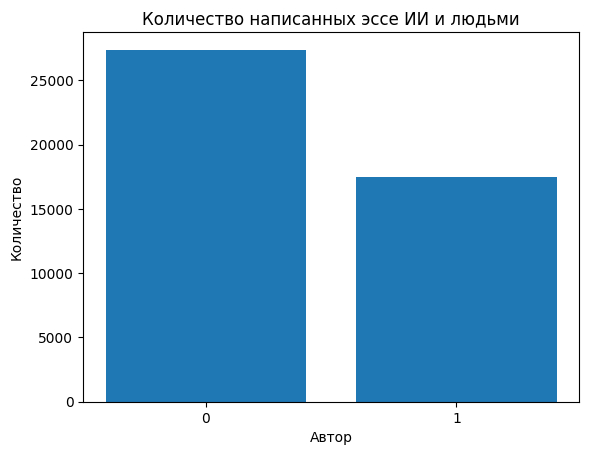

{0: 27371, 1: 17497}


In [475]:
unique_values_of_authors, test_counts = np.unique(train_df_ext['generated'], return_counts=True)
unique_dict = {value: count for value, count in zip(unique_values_of_authors, test_counts)}
plt.bar(unique_values_of_authors, test_counts)
plt.title('Количество написанных эссе ИИ и людьми')
plt.xlabel('Автор')
plt.ylabel('Количество')
plt.xticks(unique_values_of_authors)
plt.show()
print(unique_dict)

In [476]:
train_df = pd.concat([train_df[["text", "generated"]], train_df_ext[["text", "generated"]]])

print(train_df.info())

train_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 46246 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None


,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


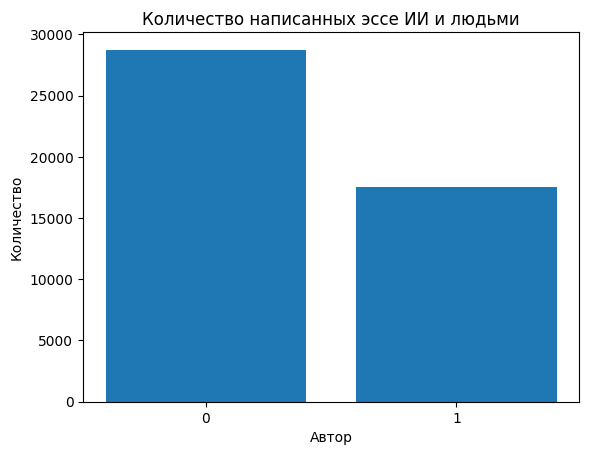

{0: 28746, 1: 17500}


In [477]:
unique_values_of_authors, test_counts = np.unique(train_df['generated'], return_counts=True)
unique_dict = {value: count for value, count in zip(unique_values_of_authors, test_counts)}
plt.bar(unique_values_of_authors, test_counts)
plt.title('Количество написанных эссе ИИ и людьми')
plt.xlabel('Автор')
plt.ylabel('Количество')
plt.xticks(unique_values_of_authors)
plt.show()
print(unique_dict)

In [478]:
train_df["words_amount"] = train_df["text"].apply(lambda x : len(x.split()))

train_df.head()

,text,generated,words_amount
0,Cars. Cars have been around since they became ...,0,584
1,Transportation is a large necessity in most co...,0,462
2,"""America's love affair with it's vehicles seem...",0,744
3,How often do you ride in a car? Do you drive a...,0,686
4,Cars are a wonderful thing. They are perhaps o...,0,871


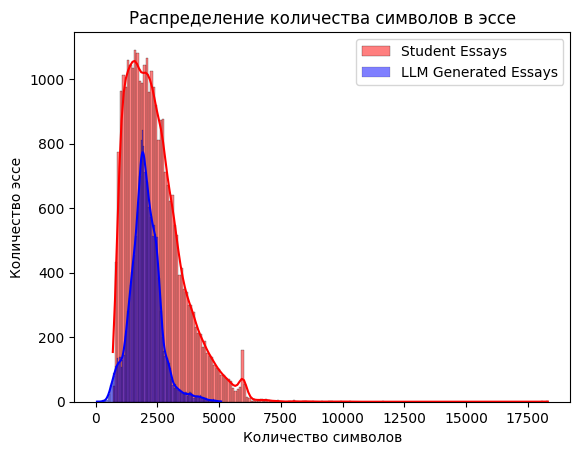

In [479]:
import seaborn as sns

train_df['characters_amount'] = train_df['text'].apply(len)

sns.histplot(train_df[train_df['generated'] == 0]['characters_amount'], color="red", label='Student Essays', kde=True)
sns.histplot(train_df[train_df['generated'] == 1]['characters_amount'], color="blue", label='LLM Generated Essays', kde=True)

plt.title('Распределение количества символов в эссе')
plt.xlabel('Количество символов')
plt.ylabel('Количество эссе')
plt.legend()
plt.show()

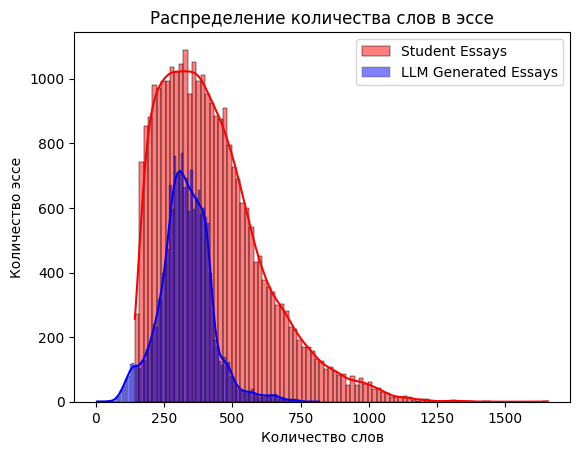

In [480]:
train_df['characters_amount'] = train_df['text'].apply(len)

sns.histplot(train_df[train_df['generated'] == 0]['words_amount'], color="red", label='Student Essays', kde=True)
sns.histplot(train_df[train_df['generated'] == 1]['words_amount'], color="blue", label='LLM Generated Essays', kde=True)

plt.title('Распределение количества слов в эссе')
plt.xlabel('Количество слов')
plt.ylabel('Количество эссе')
plt.legend()
plt.show()

In [481]:
def calculate_text_statistic(text):
    words = text.split()
    sentences = text.split('.')
    word_count = len(words)
    unique_word_count = len(set(words))
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    return word_count, unique_word_count, sentence_count, avg_word_length

train_df['metrics'] = train_df['text'].apply(calculate_text_statistic)
train_df[
    ['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']
] = pd.DataFrame(train_df['metrics'].tolist(), index=train_df.index)
train_df.drop('metrics', axis=1, inplace=True)

train_df.head()

,text,generated,words_amount,characters_amount,word_count,unique_word_count,sentence_count,avg_word_length
0,Cars. Cars have been around since they became ...,0,584,3289,584,309,27,4.628425
1,Transportation is a large necessity in most co...,0,462,2738,462,272,27,4.919913
2,"""America's love affair with it's vehicles seem...",0,744,4428,744,372,49,4.947581
3,How often do you ride in a car? Do you drive a...,0,686,4013,686,411,44,4.848397
4,Cars are a wonderful thing. They are perhaps o...,0,871,4698,871,398,53,4.391504


In [482]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(iterations=300)
model.fit(train_df.drop(columns=['text', 'generated']), train_df['generated'])
predictions = model.predict(train_df.drop(columns=['text', 'generated']))

accuracy = accuracy_score(train_df['generated'], predictions)
accuracy

Learning rate set to 0.159735
0:	learn: 0.5791394	total: 8.68ms	remaining: 2.6s
1:	learn: 0.5080686	total: 16.5ms	remaining: 2.46s
2:	learn: 0.4635641	total: 24.3ms	remaining: 2.41s
3:	learn: 0.4359612	total: 32.5ms	remaining: 2.4s
4:	learn: 0.4148661	total: 40.7ms	remaining: 2.4s
5:	learn: 0.4000074	total: 49ms	remaining: 2.4s
6:	learn: 0.3898698	total: 57ms	remaining: 2.39s
7:	learn: 0.3835346	total: 65.1ms	remaining: 2.38s
8:	learn: 0.3762404	total: 73.5ms	remaining: 2.38s
9:	learn: 0.3712829	total: 82ms	remaining: 2.38s
10:	learn: 0.3676584	total: 90.7ms	remaining: 2.38s
11:	learn: 0.3634623	total: 99ms	remaining: 2.38s
12:	learn: 0.3602215	total: 107ms	remaining: 2.37s
13:	learn: 0.3575222	total: 116ms	remaining: 2.36s
14:	learn: 0.3553337	total: 124ms	remaining: 2.35s
15:	learn: 0.3535162	total: 132ms	remaining: 2.34s
16:	learn: 0.3520262	total: 140ms	remaining: 2.33s
17:	learn: 0.3505575	total: 148ms	remaining: 2.32s
18:	learn: 0.3488185	total: 156ms	remaining: 2.31s
19:	learn: 

0.8710374951347144

In [483]:
test_df = pd.read_csv('test_essays.csv')

test_df["words_amount"] = test_df["text"].apply(lambda x : len(x.split()))
test_df['characters_amount'] = test_df['text'].apply(len)
test_df['metrics'] = test_df['text'].apply(calculate_text_statistic)
test_df[
    ['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']
] = pd.DataFrame(test_df['metrics'].tolist(), index=test_df.index)
test_df = test_df.drop(columns=['text', 'prompt_id', 'metrics'])

predictions = model.predict(test_df.drop(columns='id'))

pd.DataFrame({'id':test_df["id"],'generated':predictions}).to_csv('submission.csv', index=False)